In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 106s 1us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
classes={0:"Airplane",
        1:"Automobile",
        2:"Bird",
        3:"Cat",
        4:"Deer",
        5:"Dog",
        6:"Frog",
        7:"Horse",
        8:"Ship",
        9:"Truck"}

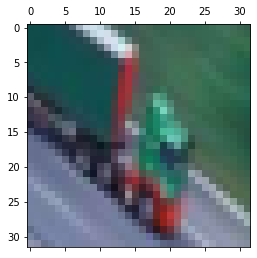

In [13]:
plt.matshow(x_train[50])

In [14]:
classes[y_train[50][0]]

'Truck'

In [15]:
y_train.shape

(50000, 1)

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),strides=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,138 (141.16 KB)

 Trainable params: 36,138 (141.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
trained_history=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.0972 - loss: 18.1721 - val_accuracy: 0.0973 - val_loss: 2.3041
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.0983 - loss: 2.3147 - val_accuracy: 0.0999 - val_loss: 2.3028
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.0997 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.1013 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0

In [21]:
hist=trained_history.history

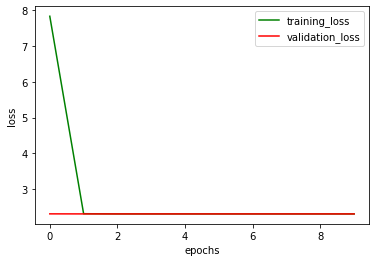

In [22]:
plt.plot(hist["loss"],label="training_loss",color="green")
plt.plot(hist["val_loss"],label="validation_loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

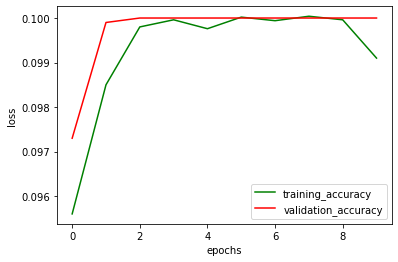

In [23]:
plt.plot(hist["accuracy"],label="training_accuracy",color="green")
plt.plot(hist["val_accuracy"],label="validation_accuracy",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [24]:
import numpy as np
def predict(index):
    plt.imshow(x_test[index])
    pred_image=x_test[index].reshape(1,32,32,3)
    pred_prob=model.predict(pred_image)
    pred_class=np.argmax(pred_prob)
    print("Original classes:",classes[y_test[index][0]])
    print("Predicted classes:",classes[pred_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Original classes: Horse
Predicted classes: Horse


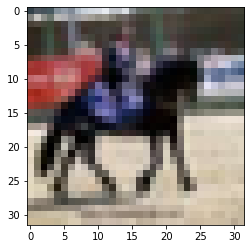

In [25]:
predict(5000)